# Data Analysis: housing


## Contents:
1. Data Loading and Overview
2. Basic Statistics
3. Data Information
4. Missing Values Analysis
5. Categorical Variables Analysis
6. Data Visualization
7. Correlation Analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Display settings
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

print('📊 Libraries loaded successfully!')

📊 Libraries loaded successfully!


## 1. Загрузка и первичный просмотр данных


In [57]:
# Загрузка данных из CSV файла
df = pd.read_csv('housing.csv')

print(f'Данные загружены: {len(df)} строк, {len(df.columns)} столбцов')

Данные загружены: 20640 строк, 10 столбцов


In [58]:
# Просмотр первых строк данных
print('Первые 5 строк:')
df.head()

Первые 5 строк:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [59]:
df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [60]:
# Показать весь датафрейм (осторожно с большими данными!)
print('Полный датафрейм:')
df

Полный датафрейм:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 2. Основная статистика


In [61]:
# Описательная статистика для числовых переменных
print('📈 Описательная статистика:')
df.describe()

📈 Описательная статистика:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [62]:
# Описательная статистика для всех переменных
print('📊 Статистика для всех типов данных:')
df.describe(include='all')

📊 Статистика для всех типов данных:


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


## 3. Информация о структуре данных


In [24]:
# Общая информация о датафрейме
print('ℹ️ Информация о данных:')
df.info()

ℹ️ Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20640 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [25]:
# Типы данных в каждом столбце
print('🔢 Типы данных:')
print(df.dtypes)
print('\n📏 Размер данных:', df.shape)

🔢 Типы данных:
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

📏 Размер данных: (20640, 8)


## 4. Анализ пропущенных значений


In [12]:
# Количество пропущенных значений в каждой колонке
print('❌ Пропущенные значения:')
missing_data = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

missing_table = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент': missing_percent
})
missing_table = missing_table[missing_table['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

if len(missing_table) > 0:
    print(missing_table)
else:
    print('✅ Пропущенных значений не найдено!')

❌ Пропущенные значения:
✅ Пропущенных значений не найдено!


In [63]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

## 5. Анализ категориальных переменных


In [26]:
# Анализ уникальных значений для каждой колонки
print('🔍 Уникальные значения в каждой колонке:')
for col in df.columns:
    unique_count = df[col].nunique()
    print(f'{col}: {unique_count} уникальных значений')
    
    # Показываем value_counts для категориальных переменных (менее 20 уникальных значений)
    if unique_count < 20 and unique_count > 1:
        print(f'  Распределение значений:')
        print(df[col].value_counts().head(10))
        print()

🔍 Уникальные значения в каждой колонке:
housing_median_age: 52 уникальных значений
total_rooms: 5926 уникальных значений
total_bedrooms: 1924 уникальных значений
population: 3888 уникальных значений
households: 1815 уникальных значений
median_income: 12928 уникальных значений
median_house_value: 3842 уникальных значений
ocean_proximity: 5 уникальных значений
  Распределение значений:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64



## 6. Визуализация данных


In [27]:
# Определяем числовые и категориальные колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'📊 Числовые колонки ({len(numeric_cols)}): {numeric_cols}')
print(f'📝 Категориальные колонки ({len(categorical_cols)}): {categorical_cols}')

📊 Числовые колонки (7): ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
📝 Категориальные колонки (1): ['ocean_proximity']


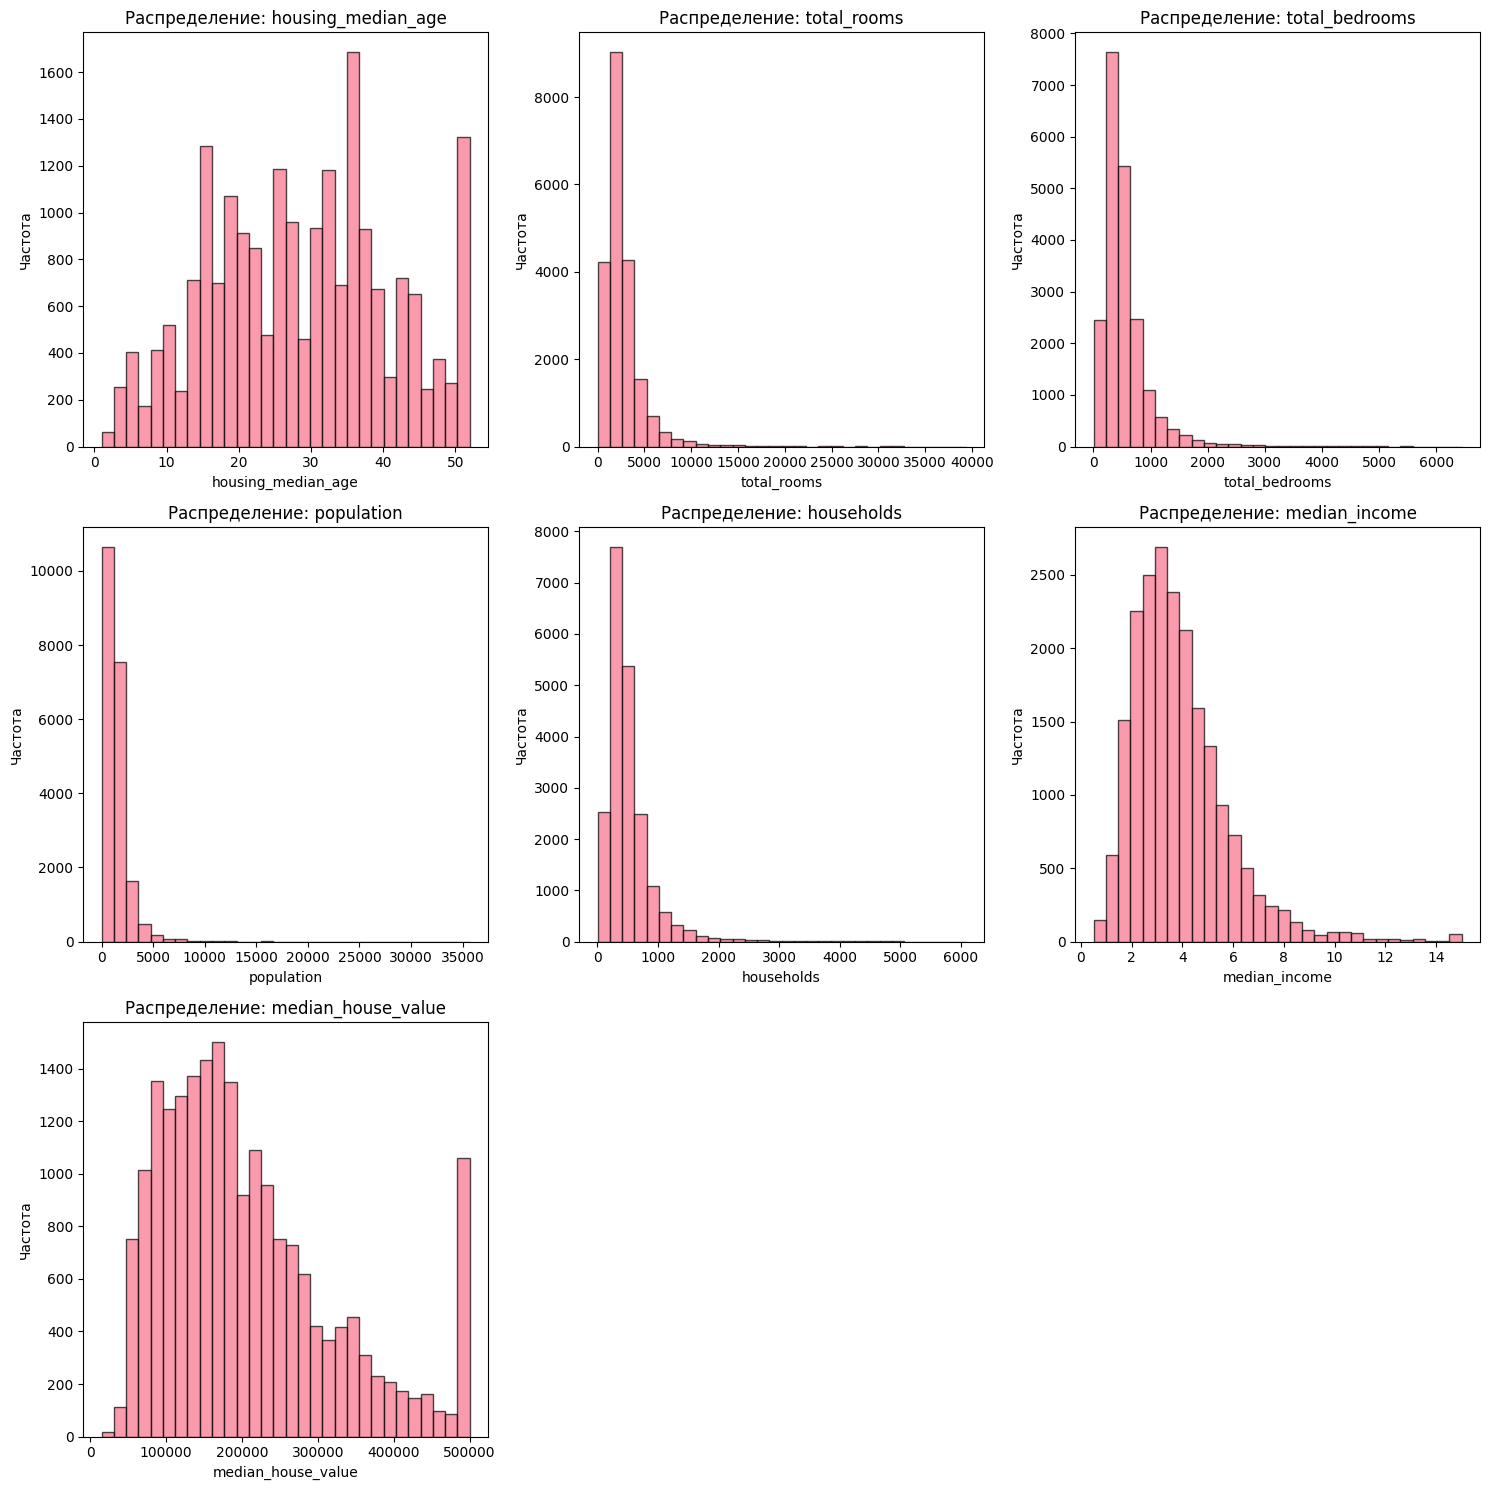

In [28]:
# Гистограммы для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'Распределение: {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Частота')
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения гистограмм не найдено.')

In [ ]:
df = pd.DataFrame(df,[''])

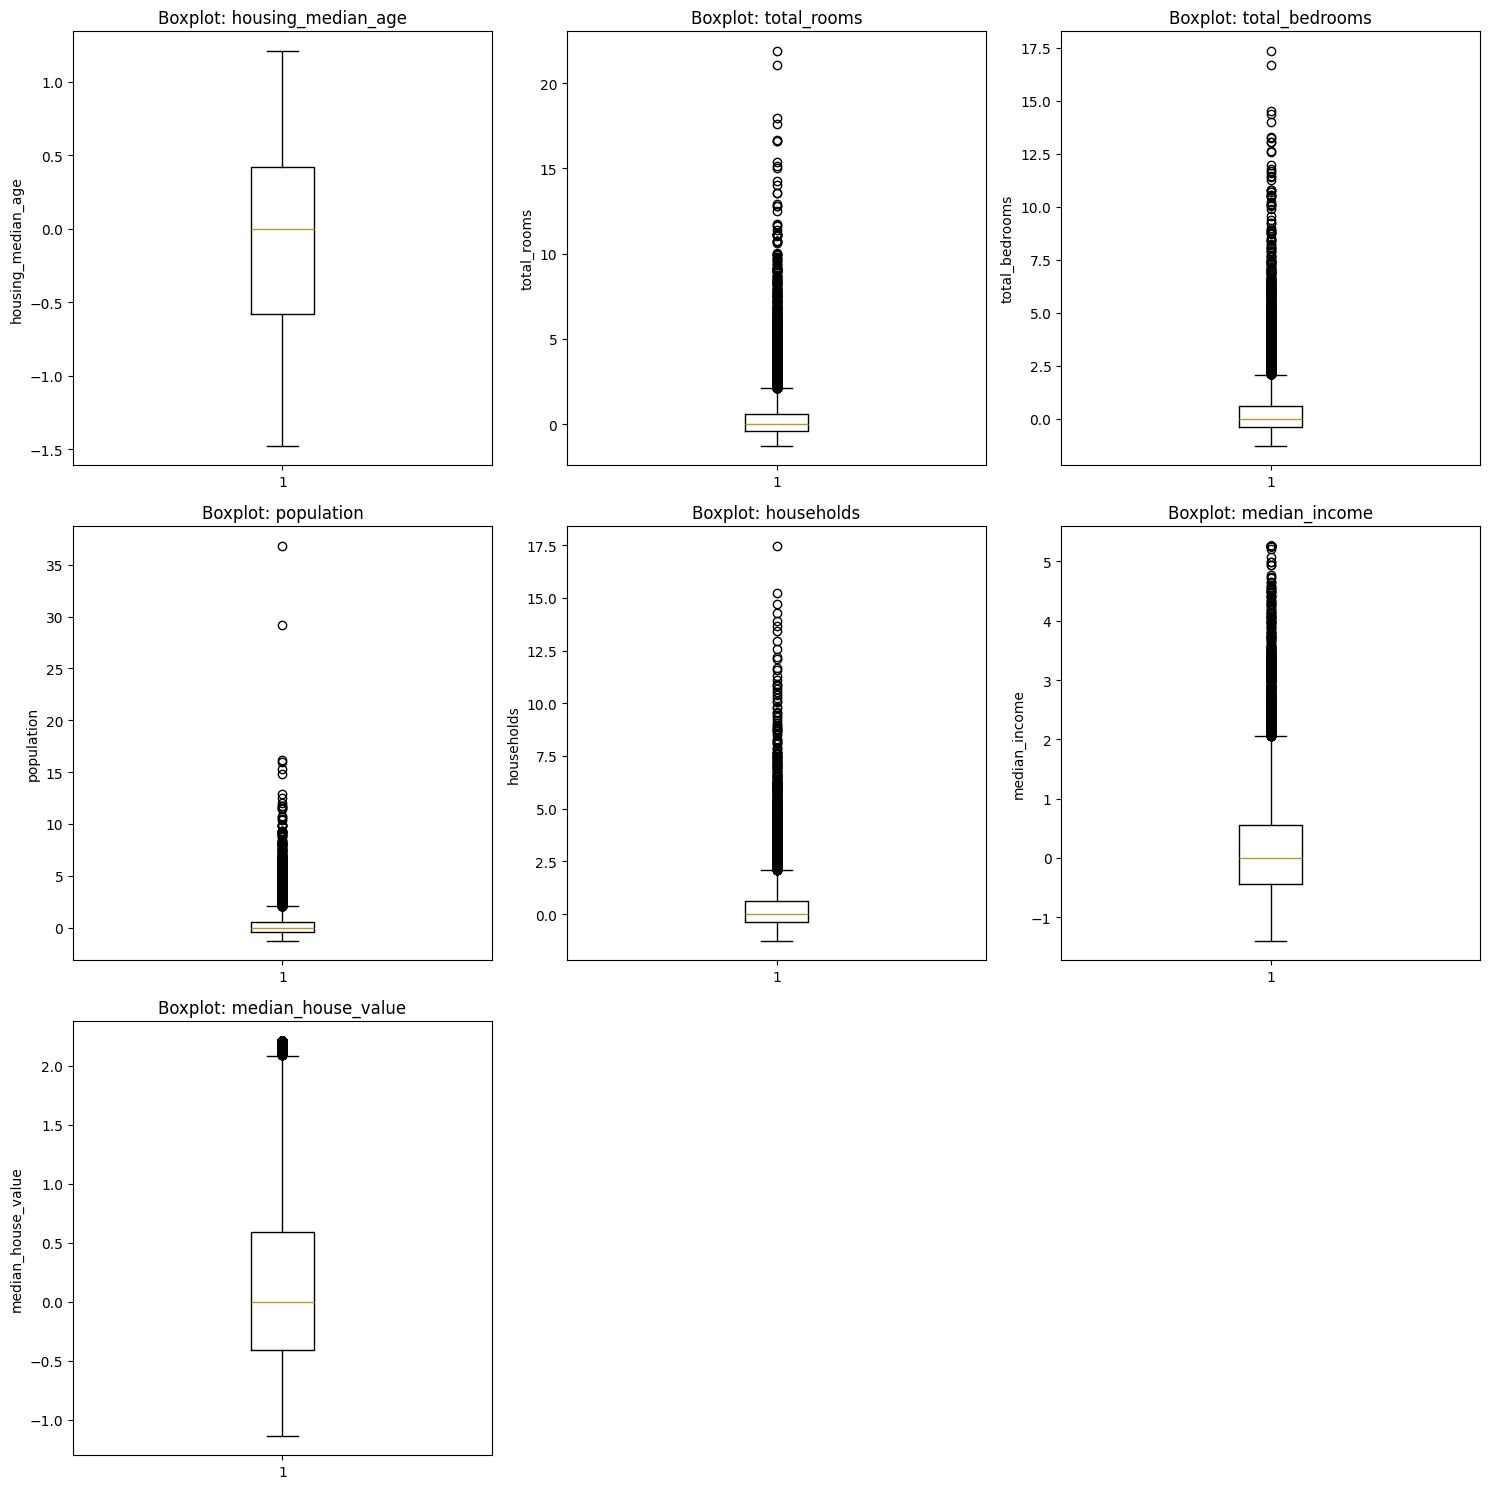

In [70]:
# Boxplot для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].boxplot(df[col].dropna())
        axes[row, col_idx].set_title(f'Boxplot: {col}')
        axes[row, col_idx].set_ylabel(col)
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения boxplot не найдено.')

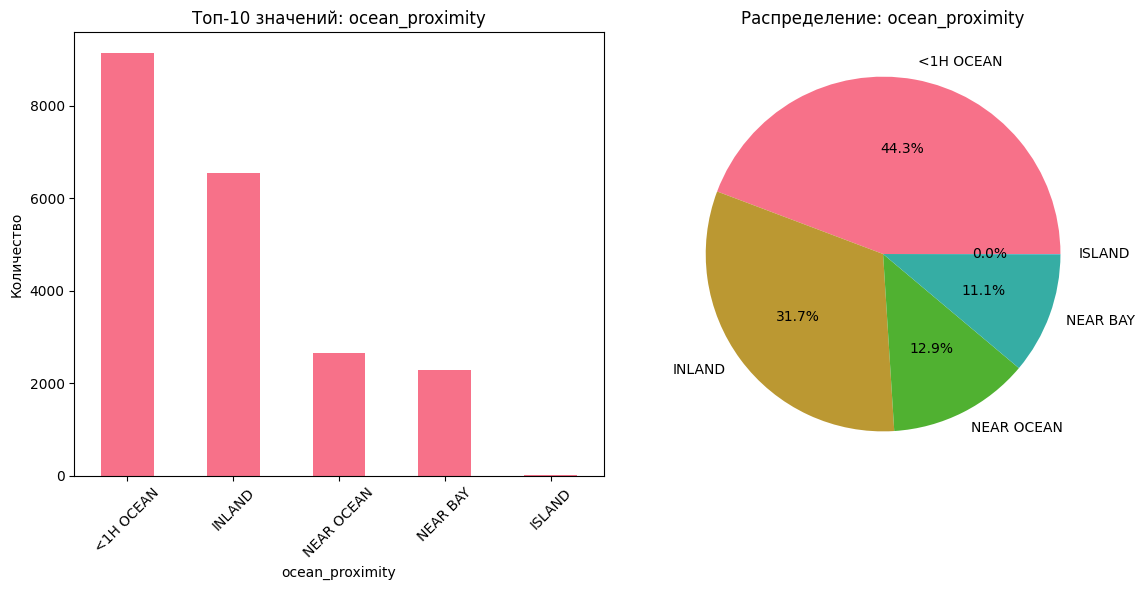

In [18]:
# Столбчатые диаграммы для категориальных переменных
if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Ограничиваем первыми 5 категориальными переменными
        plt.figure(figsize=(12, 6))
        
        # Берем топ-10 значений для отображения
        top_values = df[col].value_counts().head(10)
        
        plt.subplot(1, 2, 1)
        top_values.plot(kind='bar')
        plt.title(f'Топ-10 значений: {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Количество')
        
        plt.subplot(1, 2, 2)
        top_values.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Распределение: {col}')
        plt.ylabel('')
        
        plt.tight_layout()
        plt.show()
else:
    print('Категориальных переменных не найдено.')

## 7. Корреляционный анализ


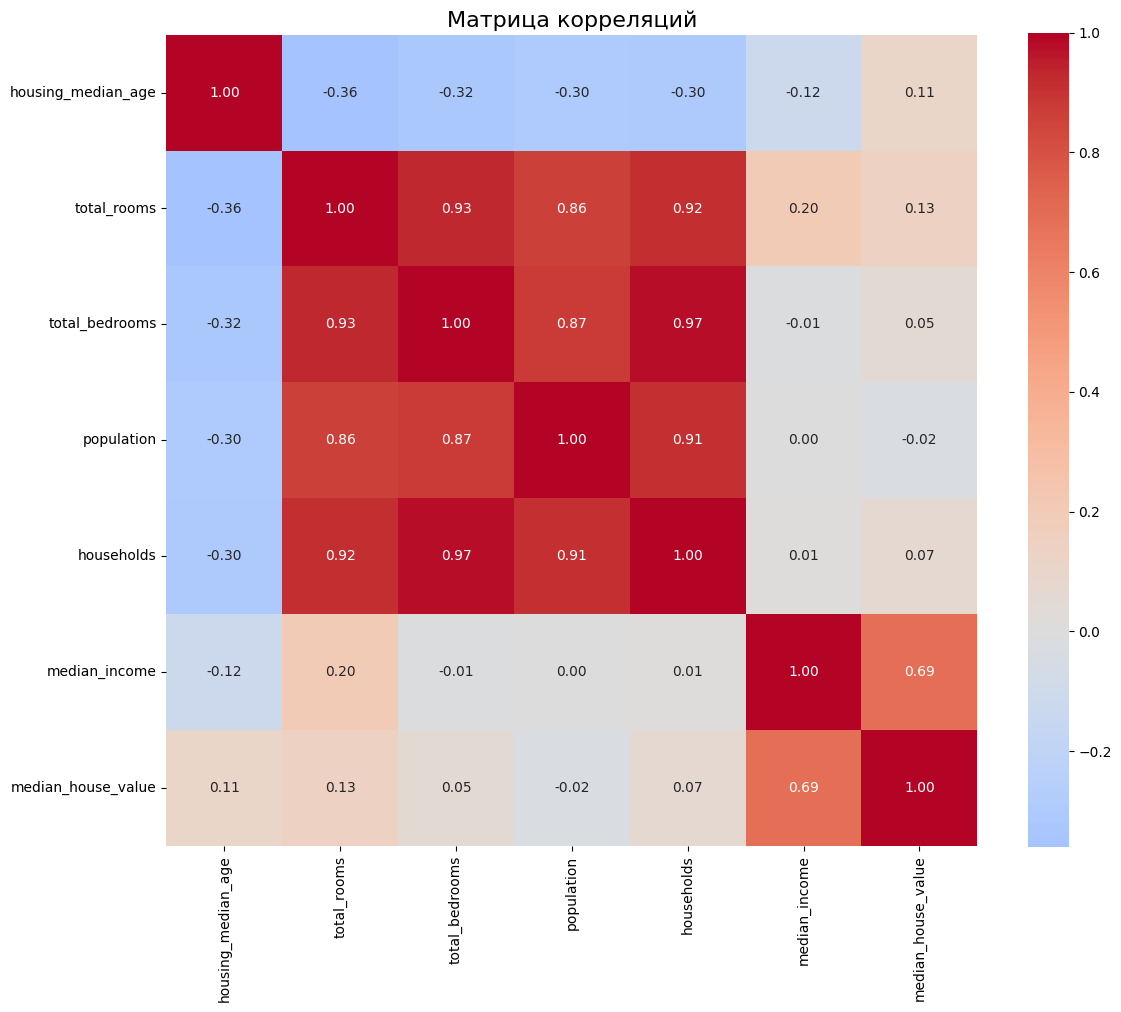

🔗 Сильные корреляции (|r| > 0.7):
  Переменная 1   Переменная 2  Корреляция
   total_rooms total_bedrooms       0.927
   total_rooms     population       0.857
   total_rooms     households       0.918
total_bedrooms     population       0.874
total_bedrooms     households       0.975
    population     households       0.907


In [71]:
# Матрица корреляций для числовых переменных
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Матрица корреляций', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Показываем сильные корреляции
    print('🔗 Сильные корреляции (|r| > 0.7):')
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append({
                    'Переменная 1': correlation_matrix.columns[i],
                    'Переменная 2': correlation_matrix.columns[j],
                    'Корреляция': round(corr_val, 3)
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        print(strong_corr_df.to_string(index=False))
    else:
        print('Сильных корреляций не найдено.')
        
elif len(numeric_cols) == 1:
    print(f'Найдена только одна числовая переменная: {numeric_cols[0]}')
else:
    print('Числовых переменных для корреляционного анализа не найдено.')

In [65]:
df = pd.get_dummies(df,columns=['ocean_proximity'])

In [68]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
df_ = rb.fit_transform(df)
df_scaled = pd.DataFrame(df_,columns=df.columns)

In [69]:
df = df_scaled

## 8. Заключение

### Основные выводы:
- Размер данных: укажите количество строк и столбцов
- Качество данных: опишите наличие пропущенных значений
- Ключевые паттерны: опишите найденные закономерности
- Рекомендации: предложите дальнейшие шаги анализа

### Дальнейшие шаги:
1. Очистка данных (если необходимо)
2. Feature engineering
3. Машинное обучение (если применимо)
4. Создание дашборда или отчета


In [72]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f"mse:{mean_squared_error(y_test, y_pred)}")
print(f"r2:{r2_score(y_test, y_pred)}")

mse:0.19192798824568927
r2:0.6915278811092493
